# 🧪 Phase 3: Statistical Summary & Correlation Analysis

## 📌 What this phase does:
- Generates summary statistics (mean, median, standard deviation, etc.) for numerical columns.
- Computes the correlation matrix to find relationships between numeric variables (e.g., between sales, month number, and year).
- Visualizes the correlation matrix using a heatmap for quick understanding.

## 🔍 Why this matters:
- Helps us understand the data distribution.
- Detects patterns or relationships between variables, which is important before building any predictive models.


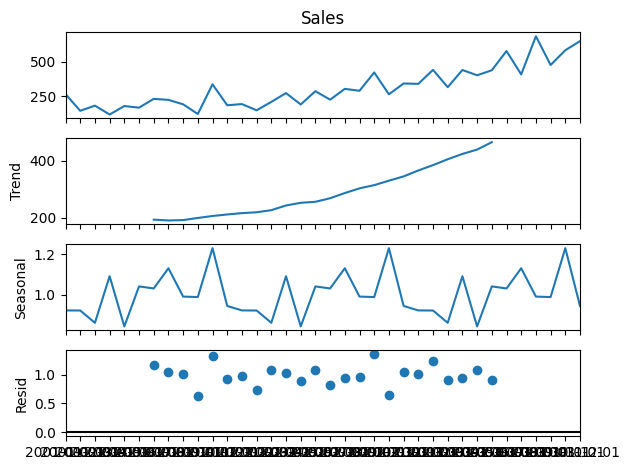

ADF Statistic: 3.0601420836411775
p-value: 1.0
❌ The series is not stationary (needs differencing).


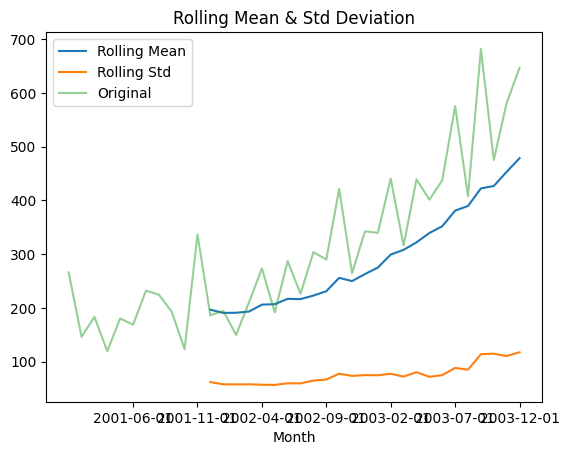

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv("cleaned_shampoo_sales.csv")

# 1. Set 'Month' as index (important for time series)
df_ts = df.set_index('Month')

# 2. Decompose the time series into Trend, Seasonality, Residuals
decompose_result = seasonal_decompose(df_ts['Sales'], model='multiplicative', period=12)
decompose_result.plot()
plt.tight_layout()
plt.show()

# 3. Check stationarity using Augmented Dickey-Fuller test (ADF)
adf_result = adfuller(df_ts['Sales'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("✅ The series is stationary (good for modeling).")
else:
    print("❌ The series is not stationary (needs differencing).")

# Optional: Plot rolling mean and std to visually inspect stationarity
df_ts['Sales'].rolling(window=12).mean().plot(label='Rolling Mean')
df_ts['Sales'].rolling(window=12).std().plot(label='Rolling Std')
df_ts['Sales'].plot(label='Original', alpha=0.5)
plt.title('Rolling Mean & Std Deviation')
plt.legend()
plt.show()
